In [9]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
# Connect to SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect('house_data.db')
c = conn.cursor()


In [11]:
def create_table():
    conn = sqlite3.connect('house_data.db')
    c = conn.cursor()

    # สร้างตาราง houses ถ้ายังไม่มี
    c.execute('''
        CREATE TABLE IF NOT EXISTS houses (
            image_path TEXT PRIMARY KEY,
            size INTEGER,
            price INTEGER,
            address TEXT UNIQUE,
            bedrooms INTEGER,
            bathrooms INTEGER,
            style TEXT
        )
    ''')

    conn.commit()
    conn.close()
    print("Table 'houses' is ready!")

# เรียกใช้ฟังก์ชันนี้ก่อน insert ข้อมูล
create_table()

Table 'houses' is ready!


In [12]:
# Function to insert data with duplicate prevention
def insert_house(image_path, size, price, address, bedrooms, bathrooms, style):
    conn = sqlite3.connect('house_data.db')
    c = conn.cursor()
    
    # Check if the record already exists
    c.execute("SELECT COUNT(*) FROM houses WHERE image_path = ? OR address = ?", (image_path, address))
    if c.fetchone()[0] > 0:
        print(f"Duplicate entry detected: {image_path} or {address} already exists.")
    else:
        c.execute('''
        INSERT INTO houses (image_path, size, price, address, bedrooms, bathrooms, style)
        VALUES (?, ?, ?, ?, ?, ?, ?)
        ''', (image_path, size, price, address, bedrooms, bathrooms, style))
        conn.commit()
        print(f"Inserted: {image_path}")

    conn.close()

In [13]:
def search_houses(min_price=None, max_price=None, min_bedrooms=None, max_bathrooms=None, style=None, min_size=None, max_size=None):
    conn = sqlite3.connect('house_data.db')
    c = conn.cursor()
    query = "SELECT image_path, size, price, address, bedrooms, bathrooms, style FROM houses WHERE 1=1"
    params = []

    if min_price is not None:
        query += " AND price >= ?"
        params.append(min_price)
    if max_price is not None:
        query += " AND price <= ?"
        params.append(max_price)
    if min_bedrooms is not None:
        query += " AND bedrooms >= ?"
        params.append(min_bedrooms)
    if max_bathrooms is not None:
        query += " AND bathrooms <= ?"
        params.append(max_bathrooms)
    if style is not None:
        query += " AND style = ?"
        params.append(style)
    if min_size is not None:
        query += " AND size >= ?"
        params.append(min_size)
    if max_size is not None:
        query += " AND size <= ?"
        params.append(max_size)

    c.execute(query, params)
    results = c.fetchall()
    conn.close()
    return results

In [23]:
# def show_house_images(houses):
#     for house in houses:
#         image_path = house[0]  # Image path is in the first column
#         try:
#             img = mpimg.imread(image_path)
#             plt.imshow(img)
#             plt.axis('off')
#             plt.title(f"Size: {house[1]} sq ft | Price: {house[2]} | Address: {house[3]}\nBedrooms: {house[4]} | Bathrooms: {house[5]} | Style: {house[6]}")
#             plt.show()
#         except FileNotFoundError:
#             print(f"Image not found: {image_path}")

import os

def show_house_images(houses):
    for house in houses:
        image_path = house[0].replace('images/', 'House_database/')  # Image path is in the first column
        size = house[1]  # Size is now directly after the image path
        if os.path.exists(image_path):
            try:
                img = mpimg.imread(image_path)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"Size: {size} sq ft | Price: {house[2]} | Address: {house[3]}\nBedrooms: {house[4]} | Bathrooms: {house[5]} | Style: {house[6]}")
                plt.show()
            except Exception as e:
                print(f"Error loading image: {image_path}. Error: {e}")
        else:
            print(f"No image available:")
            print(f"Size: {size} sq ft | Price: {house[2]} | Address: {house[3]}\nBedrooms: {house[4]} | Bathrooms: {house[5]} | Style: {house[6]}")

In [15]:
house_data_bangkok = [
    ("House_database/colonial.jpg", 220, 750000, "456 Sukhumvit Rd, Bangkok, Thailand", 4, 3, "COLONIAL"),
    ("House_database/chicago_school.jpg", 300, 900000, "789 Rama IV Rd, Bangkok, Thailand", 5, 4, "Chicago School"),
    ("House_database/classic.jpg", 180, 650000, "321 Silom Rd, Bangkok, Thailand", 3, 2, "Classic"),
    ("House_database/mediterranean.jpg", 350, 1100000, "123 Wireless Rd, Bangkok, Thailand", 5, 5, "MEDITERRANEAN"),
    ("House_database/mid_century.jpg", 200, 800000, "567 Ratchada Rd, Bangkok, Thailand", 3, 2, "MID CENTURY"),
    ("House_database/modern.jpg", 280, 1200000, "890 Sukhumvit 24, Bangkok, Thailand", 4, 3, "Modern"),
    ("House_database/modern_minimal.jpg", 190, 950000, "678 Sathorn Rd, Bangkok, Thailand", 3, 2, "Modern Minimal"),
    ("House_database/oriental.jpg", 260, 880000, "432 Rama IX Rd, Bangkok, Thailand", 4, 3, "Oriental"),
    ("House_database/scandinavian.jpg", 170, 700000, "135 Phahonyothin Rd, Bangkok, Thailand", 3, 2, "SCANDINAVIAN"),
    ("House_database/thai.jpg", 240, 680000, "256 Sukhumvit 55 (Thonglor), Bangkok, Thailand", 4, 3, "THAI"),
    ("House_database/transitional.jpg", 230, 890000, "910 Ladprao Rd, Bangkok, Thailand", 3, 3, "TRANSITIONAL"),
    ("House_database/tudor_house.jpg", 210, 780000, "112 Ekamai Rd, Bangkok, Thailand", 4, 3, "TUDOR HOUSE"),
    ("House_database/victorian.jpg", 320, 1300000, "246 Charoenkrung Rd, Bangkok, Thailand", 5, 4, "VICTORIAN"),
]


In [25]:
# วนลูปเพื่อเพิ่มข้อมูลลงในฐานข้อมูล
for house in house_data_bangkok:
    insert_house(*house)

Duplicate entry detected: House_database/colonial.jpg or 456 Sukhumvit Rd, Bangkok, Thailand already exists.
Duplicate entry detected: House_database/chicago_school.jpg or 789 Rama IV Rd, Bangkok, Thailand already exists.
Duplicate entry detected: House_database/classic.jpg or 321 Silom Rd, Bangkok, Thailand already exists.
Duplicate entry detected: House_database/mediterranean.jpg or 123 Wireless Rd, Bangkok, Thailand already exists.
Duplicate entry detected: House_database/mid_century.jpg or 567 Ratchada Rd, Bangkok, Thailand already exists.
Duplicate entry detected: House_database/modern.jpg or 890 Sukhumvit 24, Bangkok, Thailand already exists.
Duplicate entry detected: House_database/modern_minimal.jpg or 678 Sathorn Rd, Bangkok, Thailand already exists.
Duplicate entry detected: House_database/oriental.jpg or 432 Rama IX Rd, Bangkok, Thailand already exists.
Duplicate entry detected: House_database/scandinavian.jpg or 135 Phahonyothin Rd, Bangkok, Thailand already exists.
Duplica

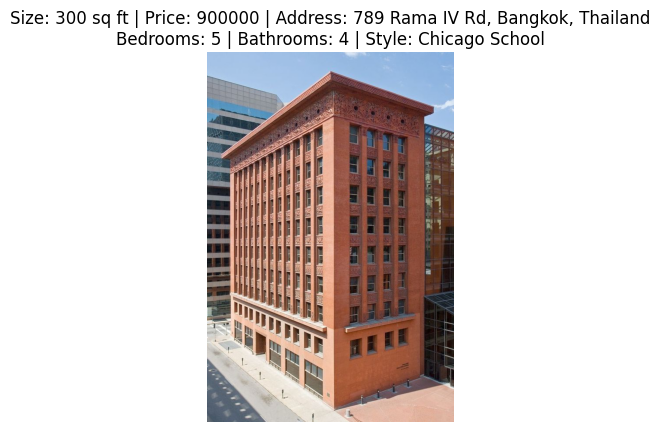

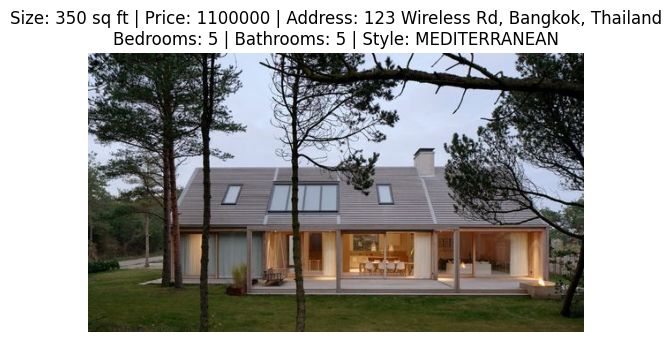

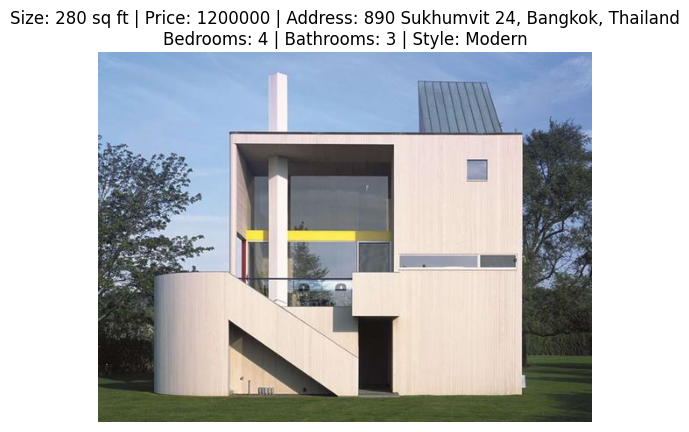

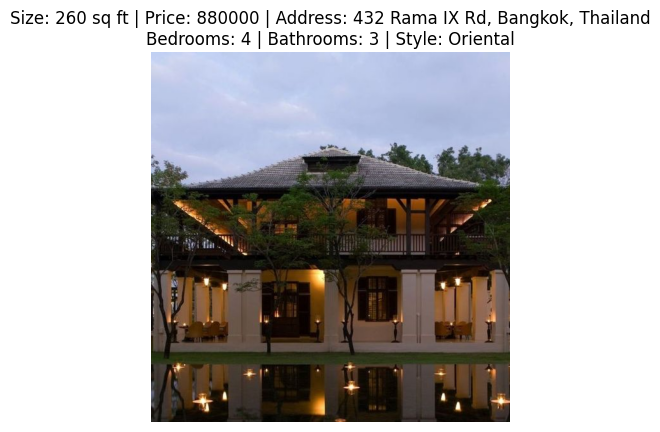

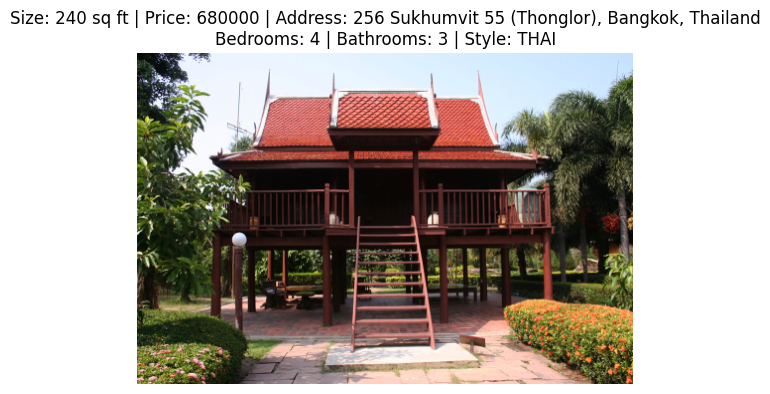

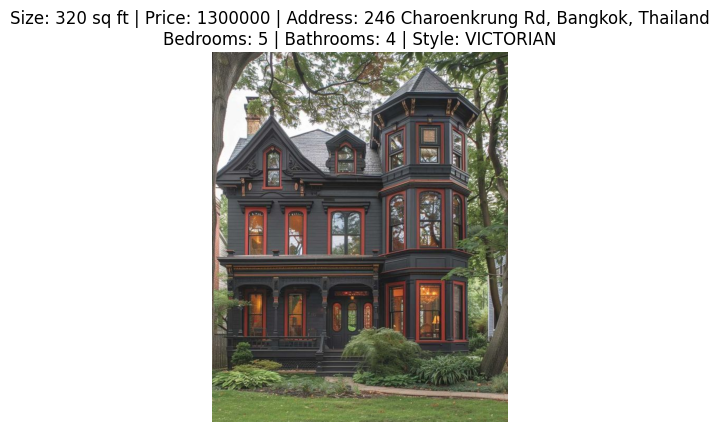

In [26]:
# Search and show results dynamically
results = search_houses(min_size=240, min_bedrooms=None, style=None)
show_house_images(results)

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
import numpy as np
import cv2
import sqlite3

def show_house_images(houses):
    for house in houses:
        image_path = house[0].replace('images/', 'House_database/')  # Image path is in the first column
        size = house[1]  # Size is now directly after the image path
        if os.path.exists(image_path):
            try:
                img = mpimg.imread(image_path)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"Size: {size} sq ft | Price: {house[2]} | Address: {house[3]}\nBedrooms: {house[4]} | Bathrooms: {house[5]} | Style: {house[6]}")
                plt.show()
            except Exception as e:
                print(f"Error loading image: {image_path}. Error: {e}")
        else:
            print(f"No image available:")
            print(f"Size: {size} sq ft | Price: {house[2]} | Address: {house[3]}\nBedrooms: {house[4]} | Bathrooms: {house[5]} | Style: {house[6]}")

def classify_house_style(image_path, model, class_labels):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize to match model input
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]
    style_name = class_labels[predicted_class]
    print(f"Predicted House Style: {style_name}")
    return style_name

def search_houses_by_style(style):
    conn = sqlite3.connect('house_data.db')
    c = conn.cursor()
    c.execute("SELECT image_path, size, price, address, bedrooms, bathrooms, style FROM houses WHERE style = ?", (style,))
    results = c.fetchall()
    conn.close()
    return results

def find_similar_houses(image_path, model, class_labels):
    predicted_style = classify_house_style(image_path, model, class_labels)
    houses = search_houses_by_style(predicted_style)
    show_house_images(houses)

# Load model
model = tf.keras.models.load_model('best_model13cls.keras')
class_labels = ["COLONIAL", "Chicago School", "Classic", "MEDITERRANEAN", "MID CENTURY",
                "Modern", "Modern Minimal", "Oriental", "SCANDINAVIAN", "THAI",
                "TRANSITIONAL", "TUDOR HOUSE", "VICTORIAN"]

# Example usage
image_path = "test_images/house_example.jpg"
find_similar_houses(image_path, model, class_labels)

ModuleNotFoundError: No module named 'distutils'